Final Project
Members: Lam Nguyen; Vu Trinh; Francesco Colombo; Minh Nguyen

         

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import tensorflow as tf
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from keras.callbacks import EarlyStopping

In [3]:
# Load the dataset
veh_df = pd.read_csv('vehicles.csv')

# 1. Missing Values Handling
threshold = 0.30  # Set threshold for missing values
# CAUTION: If change this threshold, must re-check #2 to make sure all unwanted columns still dropped.
columns_to_drop = veh_df.columns[veh_df.isnull().mean() > threshold]
veh_df.drop(columns=columns_to_drop, inplace=True)
print (columns_to_drop)


Index(['condition', 'cylinders', 'VIN', 'drive', 'size', 'paint_color',
       'county'],
      dtype='object')


In [4]:
# 2. Column Removal
columns_to_remove = ['id','url', 'region_url', 'image_url', 'id', 'fuel', 'transmission',
                     'description', 'lat', 'long', 'posting_date', 'title_status']  # Remove unnecessary columns
veh_df.drop(columns=columns_to_remove, inplace=True)
print(veh_df.columns)
# Assuming veh_df is the name of your DataFrame
print(veh_df.iloc[50:61])




Index(['region', 'price', 'year', 'manufacturer', 'model', 'odometer', 'type',
       'state'],
      dtype='object')
    region  price    year manufacturer                         model  \
50  auburn  38990  2020.0         ford        f150 supercrew cab xlt   
51  auburn  22590  2017.0          ram    1500 regular cab tradesman   
52  auburn  31590  2020.0        mazda               mx-5 miata club   
53  auburn  27990  2020.0         ford     ranger supercab xl pickup   
54  auburn  31590  2019.0     cadillac              xt4 sport suv 4d   
55  auburn  19900  2004.0         ford               f250 super duty   
56  auburn  16590  2016.0         jeep         renegade sport suv 4d   
57  auburn  26990  2016.0         ford    f150 regular cab xl pickup   
58  auburn  25590  2015.0          gmc       sierra 1500 regular cab   
59  auburn  14000  2012.0        honda                       odyssey   
60  auburn  28590  2018.0          ram  1500 quad cab express pickup   

    odometer     

In [5]:
# 3. Data Type Conversion
# Convert columns to numeric with coercion
veh_df['year'] = pd.to_numeric(veh_df['year'], errors='coerce')
veh_df['odometer'] = pd.to_numeric(veh_df['odometer'], errors='coerce')
veh_df['price'] = pd.to_numeric(veh_df['price'], errors='coerce')

# Test
# print(veh_df.iloc[50:61])


In [6]:

# 6. Categorical Encoding (Label Encoding)
label_encoder = LabelEncoder()
categorical_cols = ['manufacturer', 'model', 'region', 'type', 'state']
for col in categorical_cols:
    veh_df[col] = label_encoder.fit_transform(veh_df[col].astype(str))

# Column 'condition' didn't have enough data, was deleted
# print(veh_df.iloc[50:61])



Part #6 (one-hot coding) might try 
Dimensionality Reduction Techniques: Explore techniques like PCA or feature hashing to reduce the dimensionality of high-cardinality categorical columns.
Encoding Strategy: Consider using alternative encoding methods such as label encoding or grouping rare categories before one-hot encoding.

In [7]:
vehicles = veh_df.dropna()

In [8]:
# Calculate the IQR (Interquartile Range)
Q1 = vehicles['price'].quantile(0.25)
Q3 = vehicles['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out rows with prices outside the bounds
vehicles = vehicles[(vehicles['price'] >= lower_bound) & (vehicles['price'] <= upper_bound)]


In [9]:
# Calculate the IQR (Interquartile Range)
Q1 = vehicles['odometer'].quantile(0.25)
Q3 = vehicles['odometer'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds to identify outliers
lower_bound = Q1 - 2.0 * IQR
upper_bound = Q3 + 2.0 * IQR

# Filter out rows with prices outside the bounds
vehicles = vehicles[(vehicles['odometer'] >= lower_bound) & (vehicles['odometer'] <= upper_bound)]

In [10]:
# Remove rows with zero values in the 'price' column
df_no_zeros = vehicles[vehicles['price'] != 0]

# Print the number of rows before and after removing zeros
print(f'Number of rows before removing zeros: {len(vehicles)}')
print(f'Number of rows after removing zeros: {len(df_no_zeros)}')

# Update your dataframe with the rows without zeros
vehicles = df_no_zeros

Number of rows before removing zeros: 411089
Number of rows after removing zeros: 380515


In [27]:
# Save the cleaned data to a new CSV file
vehicles.to_csv('cleaned_vehicles.csv')

In [77]:
vehicles_categorized = vehicles.copy()

# Data Exploration

              region          price           year   manufacturer  \
count  380515.000000  380515.000000  380515.000000  380515.000000   
mean      193.639562   17732.692609    2010.984106      19.530284   
std       117.846531   12733.233830       9.456425      12.096265   
min         0.000000       1.000000    1900.000000       0.000000   
25%        82.000000    6999.000000    2008.000000      10.000000   
50%       197.000000   14995.000000    2013.000000      16.000000   
75%       290.000000   26900.000000    2017.000000      31.000000   
max       403.000000   57112.000000    2022.000000      42.000000   

               model       odometer           type          state  
count  380515.000000  380515.000000  380515.000000  380515.000000  
mean    16856.233378   92956.910611       6.518277      23.598011  
std      7807.578649   62221.273025       3.935611      15.111457  
min         1.000000       0.000000       0.000000       0.000000  
25%     11196.000000   39525.000000   

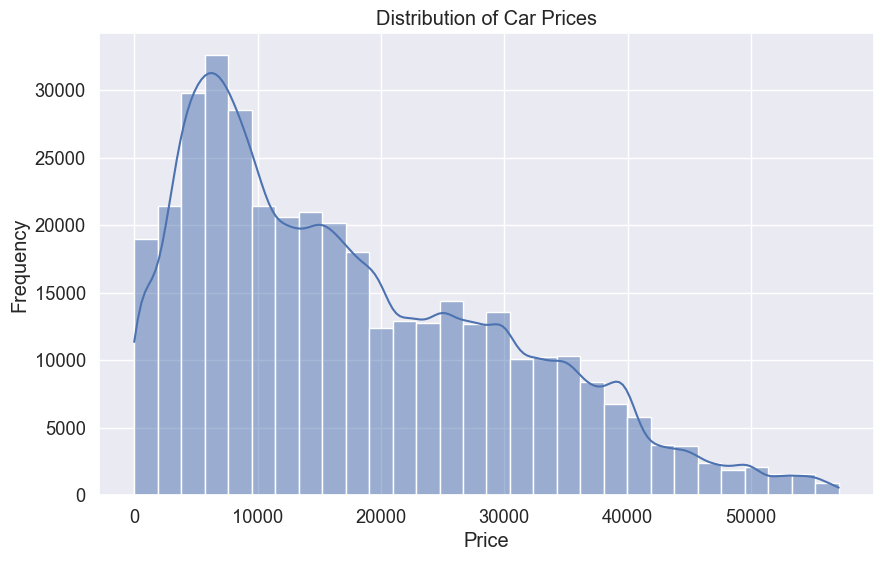

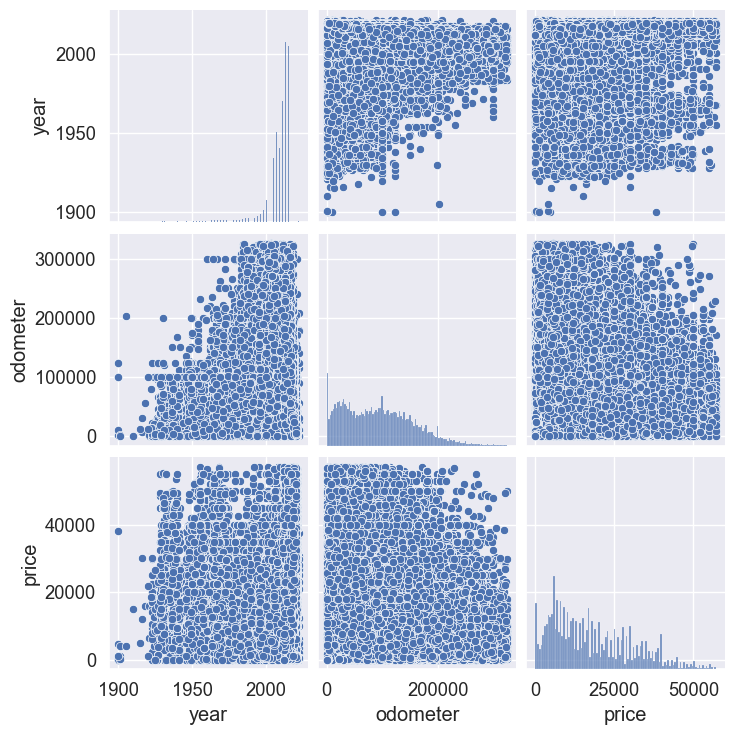

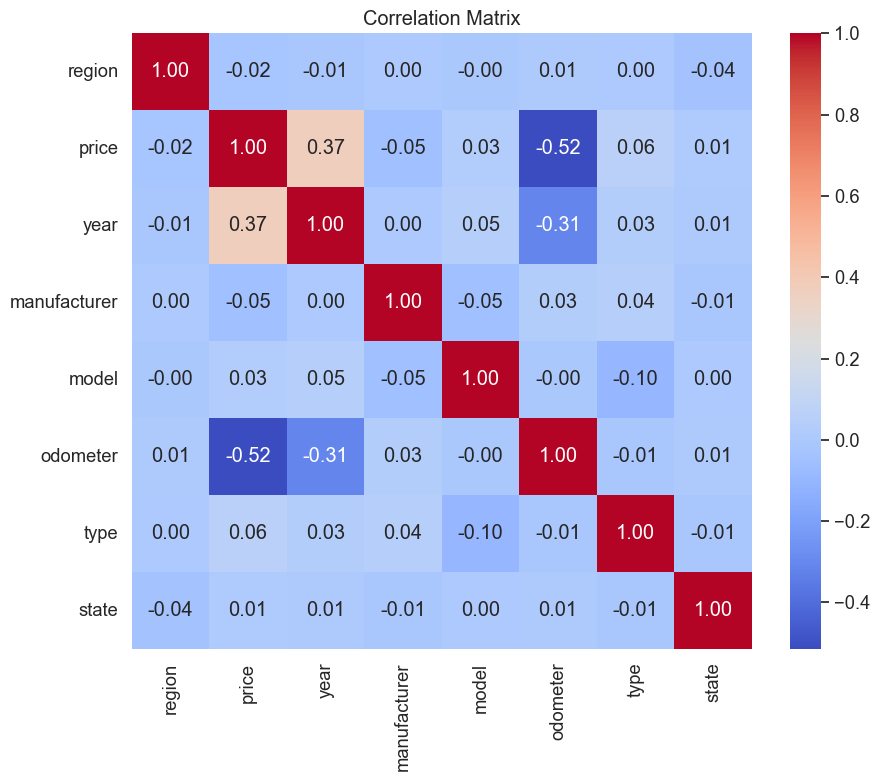

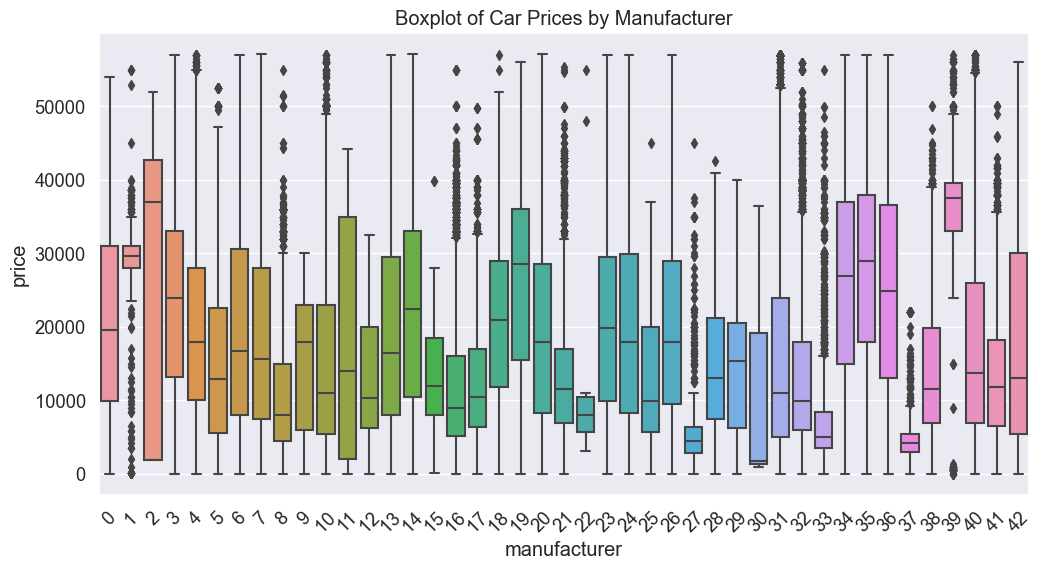

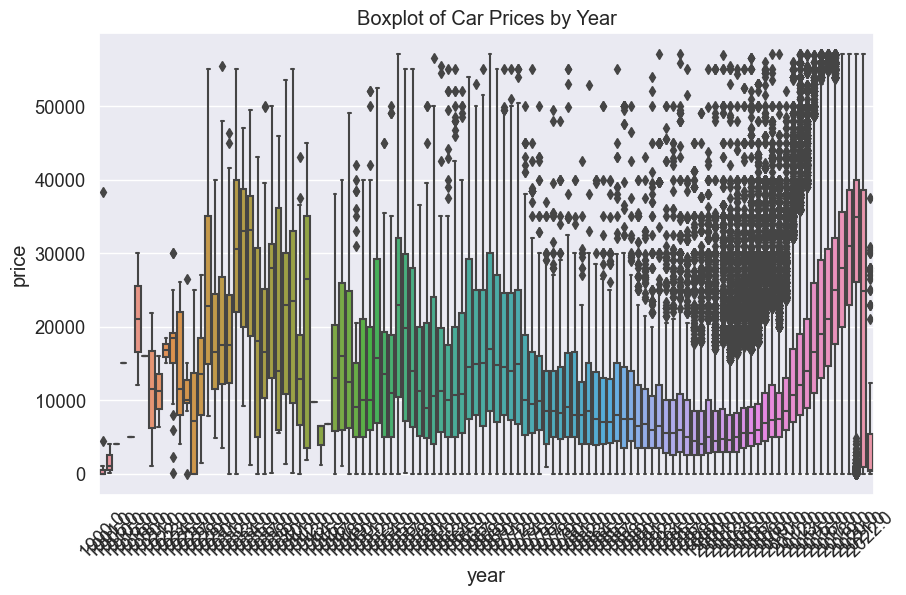

In [78]:
# Summary statistics of numerical features
print(vehicles.describe())

# Visualize the distribution of the target variable (car prices)
plt.figure(figsize=(10, 6))
sns.histplot(vehicles['price'], bins=30, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Pair plot to visualize relationships between numerical features
sns.pairplot(vehicles[['year', 'odometer', 'price']])
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(10, 8))
corr_matrix = vehicles.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Box plot for categorical variables
plt.figure(figsize=(12, 6))
sns.boxplot(x='manufacturer', y='price', data=vehicles)
plt.title('Boxplot of Car Prices by Manufacturer')
plt.xticks(rotation=45)
plt.show()

# Box plot for year
plt.figure(figsize=(10, 6))
sns.boxplot(x='year', y='price', data=vehicles)
plt.title('Boxplot of Car Prices by Year')
plt.xticks(rotation=45)
plt.show()


In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score

# Create a range of cluster counts from 2 to 200
cluster_counts = list(range(2, 201))

# Initialize lists to store the Calinski-Harabasz scores for k-means and spectral clustering
kmeans_scores = []

# Calculate scores for different cluster counts
for n_clusters in cluster_counts:
    # K-means
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init='auto')
    kmeans_clusters = kmeans.fit_predict(vehicles[['price','odometer']])
    kmeans_scores.append(calinski_harabasz_score(vehicles[['price','odometer']], kmeans_clusters))
    

# Find the best number of clusters for k-means and spectral clustering
best_kmeans_clusters = cluster_counts[kmeans_scores.index(max(kmeans_scores))]

# Compare the results
print(f"Best number of clusters for k-means: {best_kmeans_clusters}")



Best number of clusters for k-means: 6


In [90]:
#K-means clustering
kmeans = KMeans(init = "k-means++", n_clusters = 6, random_state = 0, n_init='auto')
clusters = kmeans.fit_predict(vehicles[['price','odometer']])

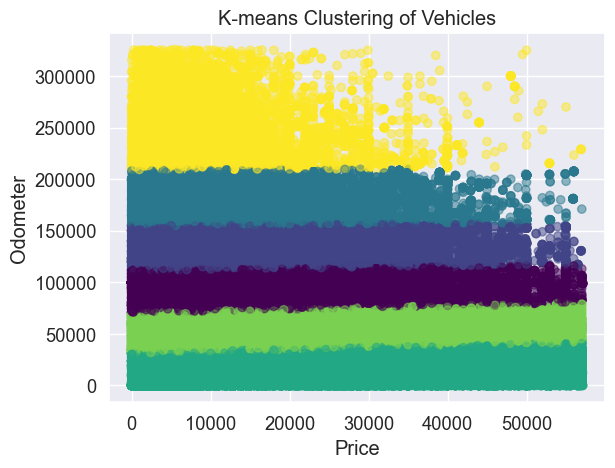

In [91]:
import matplotlib.pyplot as plt

# Add the 'cluster' column to your vehicles DataFrame
vehicles['cluster'] = clusters

# Plot the clusters
plt.scatter(vehicles['price'], vehicles['odometer'], c=clusters, cmap='viridis', alpha=0.5)
plt.title('K-means Clustering of Vehicles')
plt.xlabel('Price')
plt.ylabel('Odometer')
plt.show()


In [92]:
vehicles.drop(columns=['cluster'], inplace=True)

# Neural Network

Before reshaping - y_train shape: (304412,)
After reshaping - y_train shape: (304412, 1)
Epoch 1/100
7611/7611 [==============================] - 23s 3ms/step - loss: 91232520.0000 - mae: 6971.3481 - val_loss: 83320096.0000 - val_mae: 6587.4272
Epoch 2/100
7611/7611 [==============================] - 23s 3ms/step - loss: 80618376.0000 - mae: 6415.6060 - val_loss: 73848120.0000 - val_mae: 6162.1079
Epoch 3/100
7611/7611 [==============================] - 24s 3ms/step - loss: 73297624.0000 - mae: 5999.6606 - val_loss: 80483368.0000 - val_mae: 6552.1274
Epoch 4/100
7611/7611 [==============================] - 24s 3ms/step - loss: 68410648.0000 - mae: 5715.7710 - val_loss: 67741264.0000 - val_mae: 5712.1245
Epoch 5/100
7611/7611 [==============================] - 24s 3ms/step - loss: 65035884.0000 - mae: 5508.0444 - val_loss: 64075376.0000 - val_mae: 5457.0942
Epoch 6/100
7611/7611 [==============================] - 24s 3ms/step - loss: 62418632.0000 - mae: 5345.1729 - val_loss: 65124092.0

Epoch 53/100
7611/7611 [==============================] - 22s 3ms/step - loss: 43418752.0000 - mae: 4241.1709 - val_loss: 45426768.0000 - val_mae: 4410.4985
Epoch 54/100
7611/7611 [==============================] - 22s 3ms/step - loss: 43273420.0000 - mae: 4224.5869 - val_loss: 45025720.0000 - val_mae: 4347.3975
Epoch 55/100
7611/7611 [==============================] - 22s 3ms/step - loss: 43163160.0000 - mae: 4218.7920 - val_loss: 42824452.0000 - val_mae: 4215.7539
Epoch 56/100
7611/7611 [==============================] - 22s 3ms/step - loss: 43042188.0000 - mae: 4218.7642 - val_loss: 45176376.0000 - val_mae: 4328.0391
Epoch 57/100
7611/7611 [==============================] - 22s 3ms/step - loss: 42882972.0000 - mae: 4212.5610 - val_loss: 45286964.0000 - val_mae: 4325.7632
Epoch 58/100
7611/7611 [==============================] - 22s 3ms/step - loss: 42894964.0000 - mae: 4207.6621 - val_loss: 43740952.0000 - val_mae: 4277.1162
Epoch 59/100
7611/7611 [==============================] - 

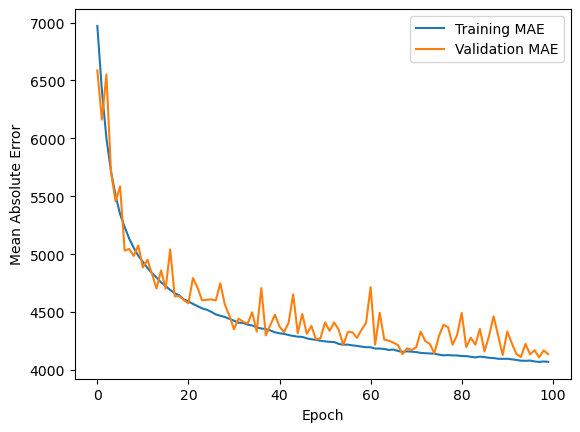

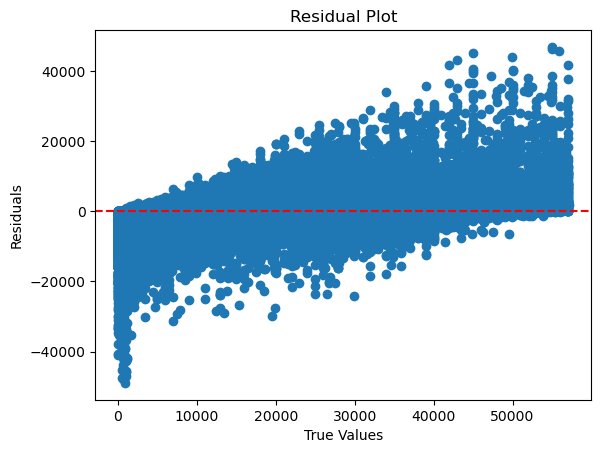

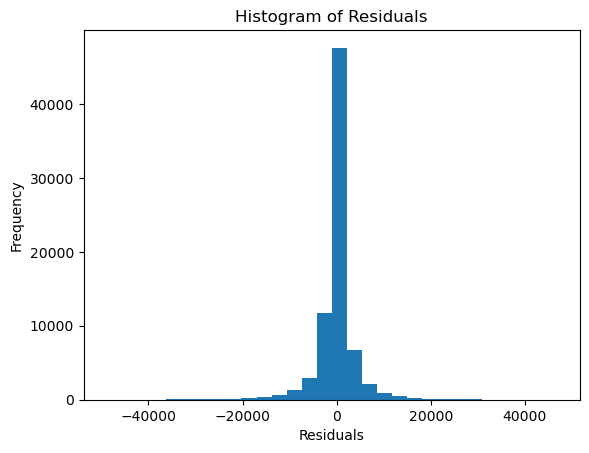

In [21]:
X = vehicles.drop('price', axis=1)
y = vehicles['price']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1000, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(500, activation='relu'),
    tf.keras.layers.Dense(200, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(1)  # Linear activation for regression
])

# Compile the model
model.compile(optimizer='rmsprop', loss='mean_squared_error', metrics=['mae'])

# early stopping callback
es = EarlyStopping(monitor='val_loss',
                   mode='min',
                   patience=50,
                   restore_best_weights = True)

print("Before reshaping - y_train shape:", y_train.shape)

# Ensure that the target variable is a 2D array
y_train = y_train.values.reshape(-1, 1).astype(np.float32)

# Print the shape after reshaping
print("After reshaping - y_train shape:", y_train.shape)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2,callbacks=[es])

# Evaluate the model on the test set
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f'Mean Absolute Error on Test Set: {mae}')

# Optionally, plot training history
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

#residual
residuals = y_test - y_pred.flatten()
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

#histogram of residuals
plt.hist(residuals, bins=30)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()



In [22]:
# Evaluate the model on the test set
loss, mae = model.evaluate(X_test_scaled, y_test)
print(f'Mean Absolute Error on Test Set: {mae}')


2379/2379 [==============================] - 1s 553us/step - loss: 42217348.0000 - mae: 4157.0757
Mean Absolute Error on Test Set: 4157.07568359375


In [23]:
# Make predictions
predictions = model.predict(X_test_scaled)

2379/2379 [==============================] - 1s 519us/step


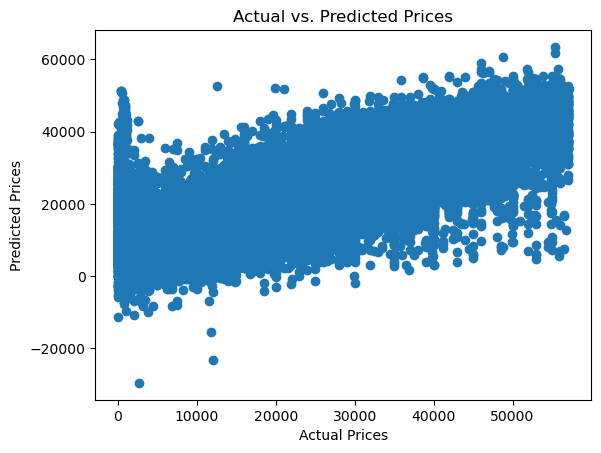

In [24]:
# Plot actual vs. predicted values
plt.scatter(y_test, predictions)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.show()

In [25]:
# Evaluate the model on the test set
y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test, y_pred)
print(f'R-squared on Test Set: {r2}')

2379/2379 [==============================] - 1s 522us/step
R-squared on Test Set: 0.7384537996254842


## Neural Network w/ Binning

Epoch 1/100
7611/7611 [==============================] - 8s 973us/step - loss: 1.0824 - accuracy: 0.5574 - val_loss: 1.0033 - val_accuracy: 0.5944
Epoch 2/100
7611/7611 [==============================] - 7s 947us/step - loss: 0.9455 - accuracy: 0.6207 - val_loss: 0.8988 - val_accuracy: 0.6389
Epoch 3/100
7611/7611 [==============================] - 7s 937us/step - loss: 0.8768 - accuracy: 0.6484 - val_loss: 0.8637 - val_accuracy: 0.6540
Epoch 4/100
7611/7611 [==============================] - 7s 945us/step - loss: 0.8418 - accuracy: 0.6620 - val_loss: 0.8298 - val_accuracy: 0.6692
Epoch 5/100
7611/7611 [==============================] - 7s 958us/step - loss: 0.8167 - accuracy: 0.6732 - val_loss: 0.8086 - val_accuracy: 0.6740
Epoch 6/100
7611/7611 [==============================] - 7s 963us/step - loss: 0.7971 - accuracy: 0.6801 - val_loss: 0.7934 - val_accuracy: 0.6805
Epoch 7/100
7611/7611 [==============================] - 7s 957us/step - loss: 0.7813 - accuracy: 0.6874 - val_loss: 0

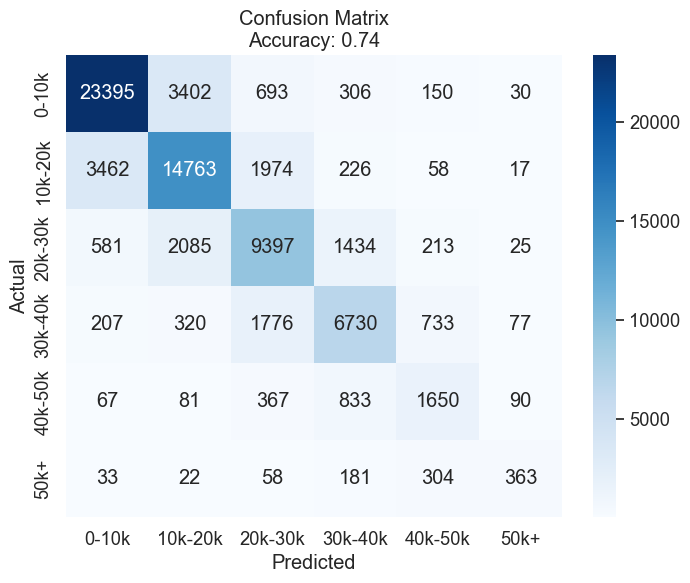

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# Assume vehicles_categorized is your DataFrame

# Define price categories
price_bins = [0, 10000, 20000, 30000, 40000, 50000, np.inf]
price_labels = ['0-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k+']

# Create a new column in the DataFrame with price categories
vehicles_categorized['price_category'] = pd.cut(vehicles_categorized['price'], bins=price_bins, labels=price_labels, right=False)

# Convert categorical labels to numerical format
label_encoder = LabelEncoder()
vehicles_categorized['price_category'] = label_encoder.fit_transform(vehicles_categorized['price_category'])

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(
    vehicles_categorized.drop(['price', 'price_category'], axis=1),
    vehicles_categorized['price_category'],
    test_size=0.2,
    random_state=42
)

# Standardize numerical features if needed
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a neural network model
model = Sequential([
    Dense(500, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(200, activation='relu'),
    Dense(100, activation='relu'),
    Dense(len(price_labels), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
y_pred_probs = model.predict(X_test_scaled)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_labels)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Plot the confusion matrix using Seaborn
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=price_labels, yticklabels=price_labels)
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Decision Trees regression

Mean Absolute Error on Test Set: 2721.4529860201137
R-squared on Test Set: 0.7650044212569674


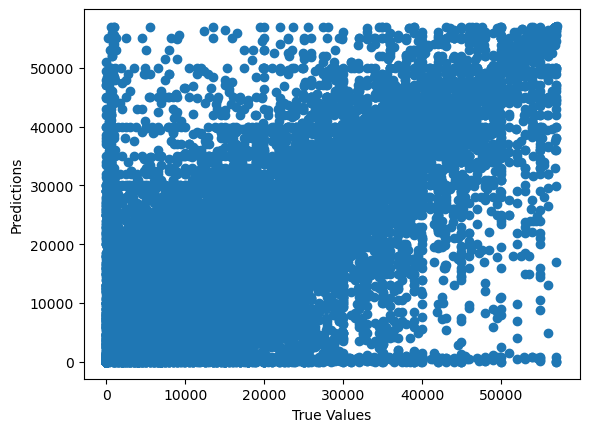

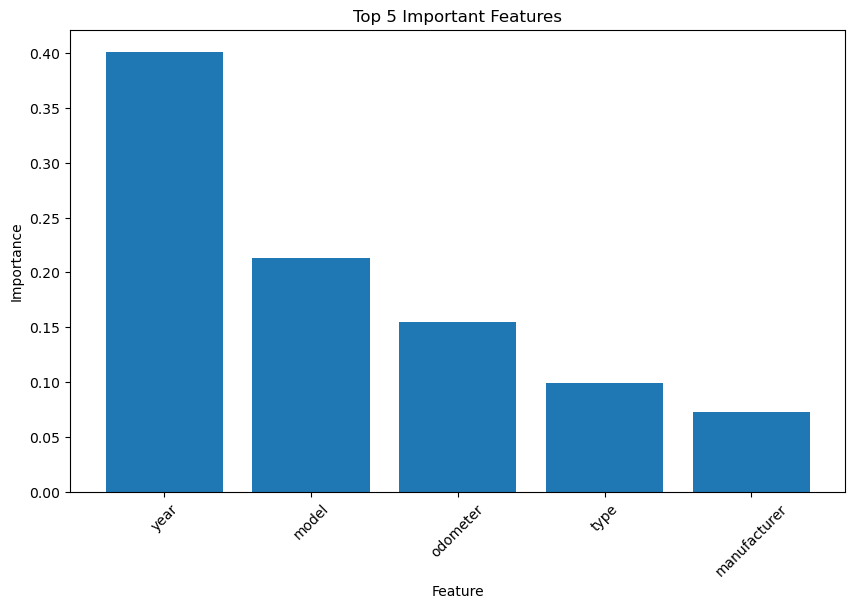

In [13]:
X = vehicles.drop('price', axis=1)
y = vehicles['price']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features if needed
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the Decision Tree model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = dt_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error on Test Set: {mae}')
r2 = r2_score(y_test, y_pred)
print(f'R-squared on Test Set: {r2}')

# Optionally, plot the predictions against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

# Plot the most important features
feature_importance = dt_model.feature_importances_
feature_names = X.columns

# Sort features by importance in descending order
sorted_idx = np.argsort(feature_importance)[::-1]

# Plot the top N important features
top_n = 5  # Adjust N based on your preference
plt.figure(figsize=(10, 6))
plt.bar(range(top_n), feature_importance[sorted_idx][:top_n], align="center")
plt.xticks(range(top_n), feature_names[sorted_idx][:top_n], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Top 5 Important Features")
plt.show()


## Decision Trees w/ Binning

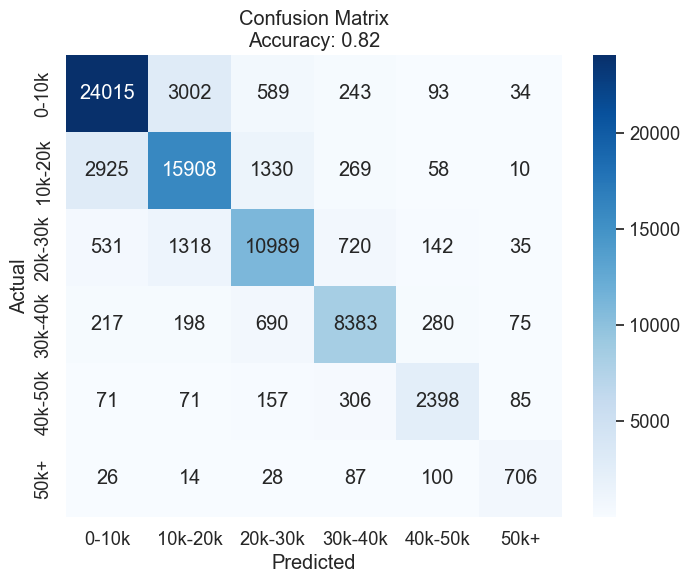

In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Assume vehicles_categorized is your DataFrame

# Define price categories
price_bins = [0, 10000, 20000, 30000, 40000, 50000, np.inf]
price_labels = ['0-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k+']

# Create a new column in the DataFrame with price categories
vehicles_categorized['price_category'] = pd.cut(vehicles_categorized['price'], bins=price_bins, labels=price_labels, right=False)

# Convert categorical labels to numerical format
label_encoder = LabelEncoder()
vehicles_categorized['price_category'] = label_encoder.fit_transform(vehicles_categorized['price_category'])

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(
    vehicles_categorized.drop(['price', 'price_category'], axis=1),
    vehicles_categorized['price_category'],
    test_size=0.2,
    random_state=42
)

# Standardize numerical features if needed
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build a decision tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_labels = model.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_labels)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Plot the confusion matrix using Seaborn
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=price_labels, yticklabels=price_labels)
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Random Forest Regression

Mean Absolute Error on Test Set: 2256.80041176939
R-squared on Test Set: 0.8750482944594794


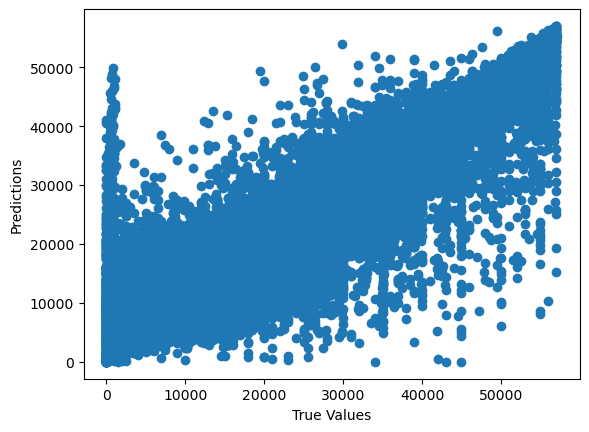

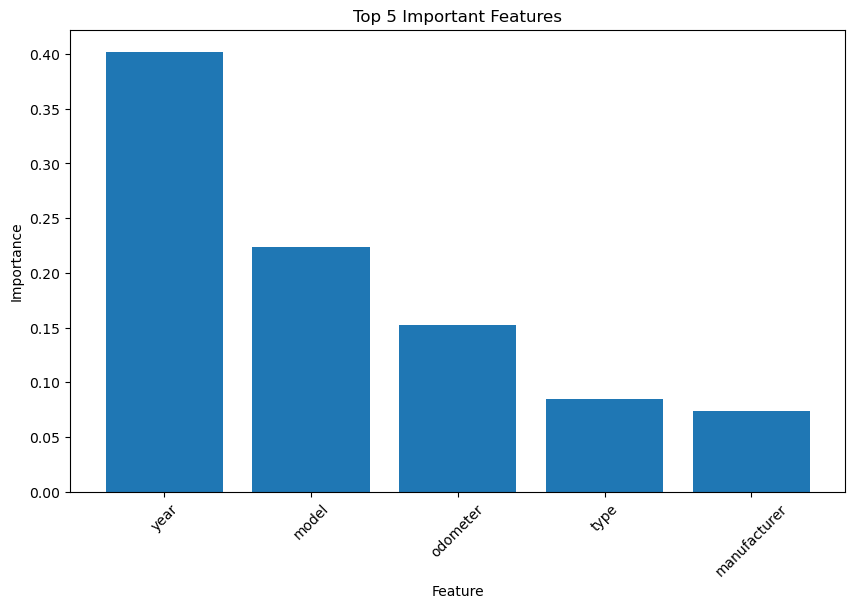

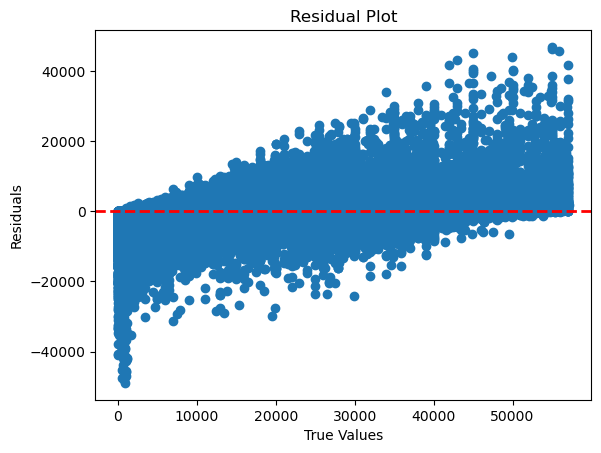

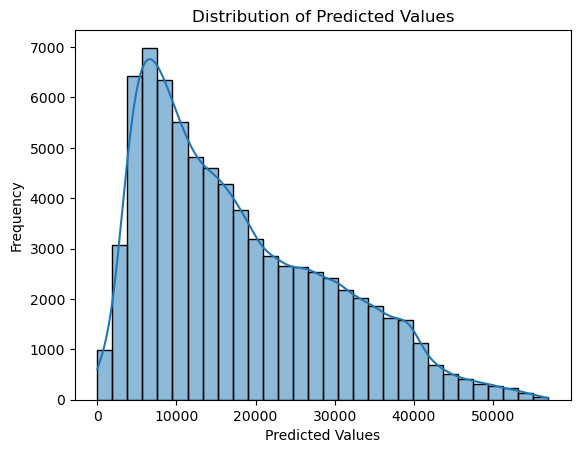

In [18]:
X = vehicles.drop('price', axis=1)
y = vehicles['price']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features if needed
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error on Test Set: {mae}')
print(f'R-squared on Test Set: {r2}')

# Optionally, plot the predictions against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

# Plot the most important features
feature_importance = rf_model.feature_importances_
feature_names = X.columns

# Sort features by importance in descending order
sorted_idx = np.argsort(feature_importance)[::-1]

# Plot the top N important features
top_n = 5
plt.figure(figsize=(10, 6))
plt.bar(range(top_n), feature_importance[sorted_idx][:top_n], align="center")
plt.xticks(range(top_n), feature_names[sorted_idx][:top_n], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title(f"Top {top_n} Important Features")
plt.show()

#residual plot
residuals = y_test - y_pred
plt.scatter(y_test, residuals)
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.axhline(0, color='red', linestyle='--', lw=2)
plt.title('Residual Plot')
plt.show()

#Distribution of predictions
sns.histplot(y_pred, bins=30, kde=True)
plt.xlabel('Predicted Values')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Values')
plt.show()


## Random Forest w/ Binning

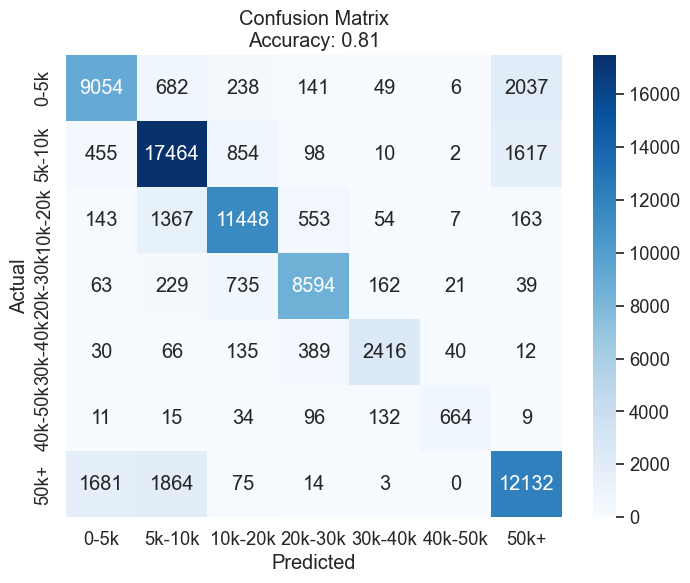

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Define price categories (you can adjust these based on your specific data)
price_bins = [0, 5000, 10000, 20000, 30000, 40000, 50000, np.inf]
price_labels = ['0-5k', '5k-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k+']

# Assuming vehicles_categorized is your DataFrame
# Create a new column in the DataFrame with price categories
vehicles_categorized['price_category'] = pd.cut(vehicles_categorized['price'], bins=price_bins, labels=price_labels, right=False)

# Convert categorical labels to numerical format
label_encoder = LabelEncoder()
vehicles_categorized['price_category'] = label_encoder.fit_transform(vehicles_categorized['price_category'])

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(
    vehicles_categorized.drop(['price', 'price_category'], axis=1),
    vehicles_categorized['price_category'],
    test_size=0.2,
    random_state=42
)

# Build and train the Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using Seaborn
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=price_labels, yticklabels=price_labels)
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Linear Regression

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.319
Method:                 Least Squares   F-statistic:                 2.038e+04
Date:                Wed, 06 Dec 2023   Prob (F-statistic):               0.00
Time:                        09:55:50   Log-Likelihood:            -3.2509e+06
No. Observations:              304412   AIC:                         6.502e+06
Df Residuals:                  304404   BIC:                         6.502e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -6.031e+05   4284.251   -140.772   

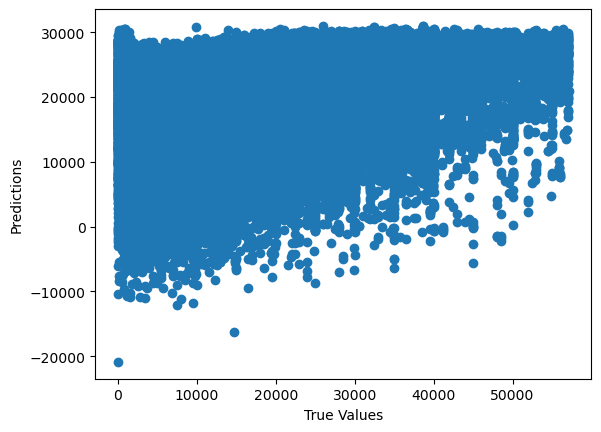

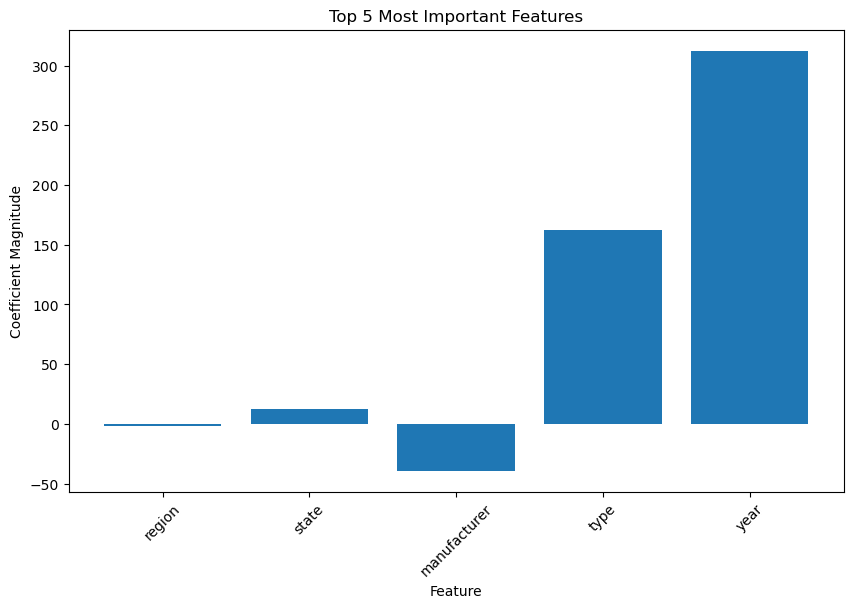

In [17]:
X = vehicles.drop('price', axis=1)
y = vehicles['price']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the Linear regression model
reg = LinearRegression().fit(X_train, y_train)

# Add a constant to the features matrix (required for statsmodels)
X_train = sm.add_constant(X_train)

# Fit the OLS (Ordinary Least Squares) model
ols_model = sm.OLS(y_train, X_train).fit()

# Print the summary
print(ols_model.summary())

# Make predictions on the test set
y_pred = reg.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error on Test Set: {mae}')
print(f'R-squared on Test Set: {r2}')


# Optionally, plot the predictions against the actual values
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()


# Extract feature importances (coefficients)
feature_importance = reg.coef_
feature_names = X.columns

# Sort features based on importance
sorted_idx = np.argsort(np.abs(feature_importance))

# Display the top N most important features
top_n = 5  # Adjust N based on your preference
plt.figure(figsize=(10, 6))
plt.bar(range(top_n), feature_importance[sorted_idx][-top_n:], align="center")
plt.xticks(range(top_n), feature_names[sorted_idx][-top_n:], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Coefficient Magnitude")
plt.title(f"Top {top_n} Most Important Features")
plt.show()

## Logistic Regression
This is done with binning of the price instead of the the original 'price' column

Confusion Matrix:
[[22626  3263  1062  1025     0     0]
 [10832  5793  3037   838     0     0]
 [ 3546  3694  4872  1623     0     0]
 [ 1515  2092  4224  2012     0     0]
 [  546   671  1167   704     0     0]
 [  150   224   295   292     0     0]]


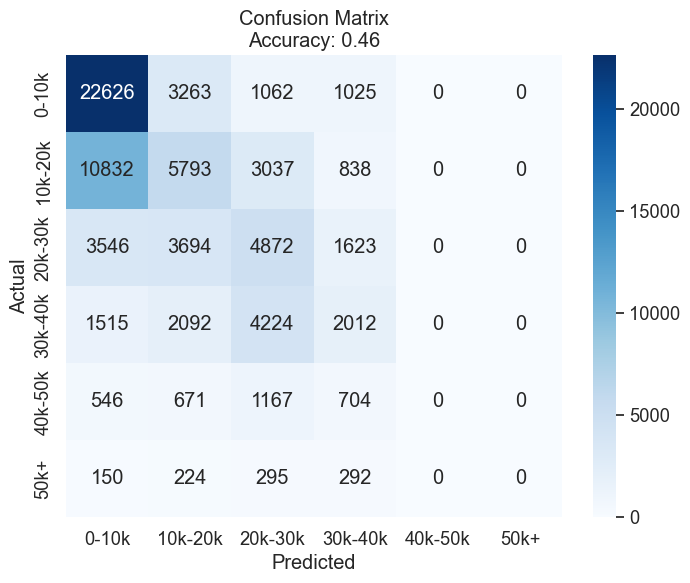

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Define price categories (you can adjust these based on your specific data)
price_bins = [0, 10000, 20000, 30000, 40000, 50000, np.inf]
price_labels = ['0-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k+']

# Create a new column in the DataFrame with price categories
vehicles_categorized['price_category'] = pd.cut(vehicles_categorized['price'], bins=price_bins, labels=price_labels, right=False)

# Convert categorical labels to numerical format
label_encoder = LabelEncoder()
vehicles_categorized['price_category'] = label_encoder.fit_transform(vehicles_categorized['price_category'])

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(vehicles_categorized.drop(['price', 'price_category'], axis=1), vehicles_categorized['price_category'], test_size=0.2, random_state=42)

# Build and train the Logistic Regression model
logreg = LogisticRegression(max_iter=10000)  # You might need to adjust max_iter based on your data
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print(f'Confusion Matrix:\n{conf_matrix}')

# Optionally, plot the confusion matrix using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=price_labels, yticklabels=price_labels)
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## XGBoost

/Users/francescocolombo/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:33:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


Mean Absolute Error on Test Set: 4659.851015113273
R-squared on Test Set: 0.6934777506620398


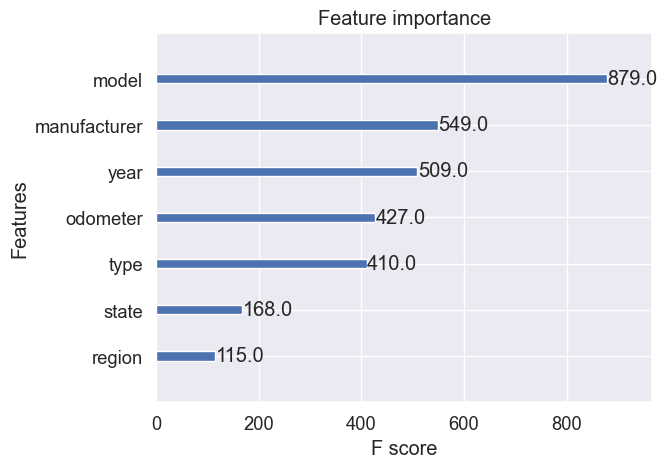

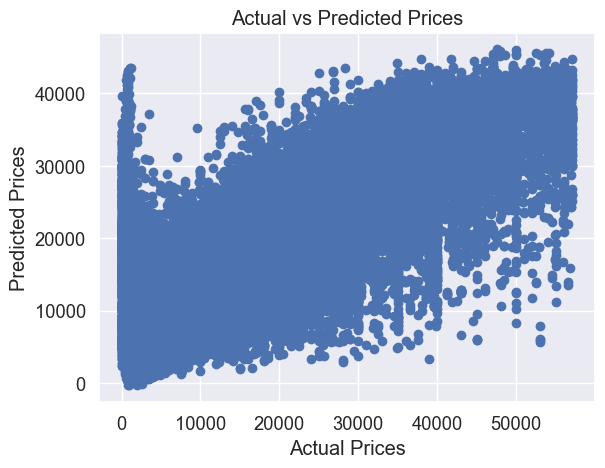

In [110]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import xgboost as xgb

# Assuming vehicles is your DataFrame

# Extract features and target variable
X = vehicles.drop('price', axis=1)
y = vehicles['price']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Specify XGBoost parameters
params = {
    'objective': 'reg:squarederror',  # Regression task
    'colsample_bytree': 0.8,          # Fraction of features to be randomly sampled for each tree
    'learning_rate': 0.1,
    'max_depth': 5,
    'alpha': 10,                       # L1 regularization term on weights
    'n_estimators': 100                # Number of boosting rounds
}

# Train the XGBoost model
model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions on the test set
y_pred = model.predict(dtest)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error on Test Set: {mae}')
print(f'R-squared on Test Set: {r2}')

# Optionally, you can plot feature importance
xgb.plot_importance(model)
plt.show()

# Plot predicted vs actual values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.show()


## XGBoost w/ Binning

/Users/francescocolombo/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [19:33:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


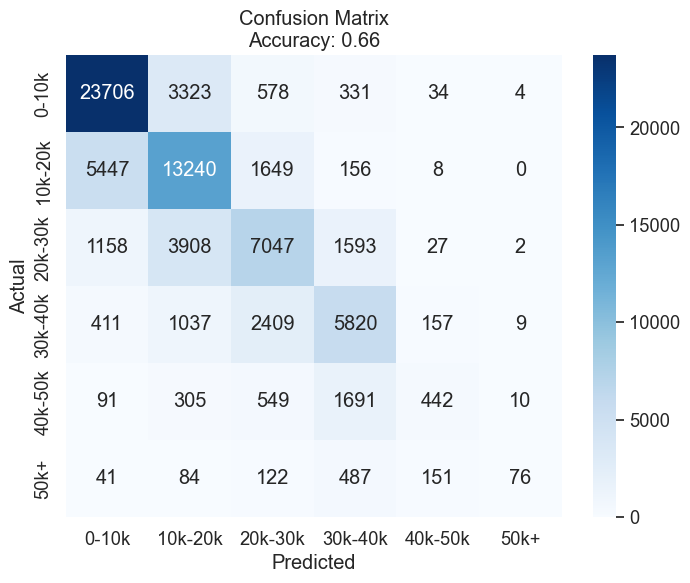

In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb


# Define price categories (you can adjust these based on your specific data)
price_bins = [0, 10000, 20000, 30000, 40000, 50000, np.inf]
price_labels = ['0-10k', '10k-20k', '20k-30k', '30k-40k', '40k-50k', '50k+']



# Create a new column in the DataFrame with price categories
vehicles_categorized['price_category'] = pd.cut(vehicles_categorized['price'], bins=price_bins, labels=price_labels, right=False)

# Convert categorical labels to numerical format
label_encoder = LabelEncoder()
vehicles_categorized['price_category'] = label_encoder.fit_transform(vehicles_categorized['price_category'])

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(vehicles_categorized.drop(['price', 'price_category'], axis=1), vehicles_categorized['price_category'], test_size=0.2, random_state=42)

# Convert data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Specify XGBoost parameters
params = {
    'objective': 'multi:softprob',   # Multiclass classification
    'num_class': len(price_labels),  # Number of classes
    'colsample_bytree': 0.8,
    'learning_rate': 0.1,
    'max_depth': 5,
    'alpha': 10,
    'n_estimators': 100
}

# Train the XGBoost model
model = xgb.train(params, dtrain, num_boost_round=100)

# Make predictions on the test set
y_pred = model.predict(dtest)

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_labels)


# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_labels)

# Plot the confusion matrix using Seaborn
sns.set(font_scale=1.2)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=price_labels, yticklabels=price_labels)
plt.title(f'Confusion Matrix\nAccuracy: {accuracy:.2f}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Exponential Regression
#### Not a good idea as the data does not have an exponential distribution

/Users/francescocolombo/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/francescocolombo/anaconda3/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:862: RuntimeWarning: overflow encountered in square
  cost = np.sum(infodict['fvec'] ** 2)
/Users/francescocolombo/anaconda3/lib/python3.11/site-packages/matplotlib/ticker.py:2094: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


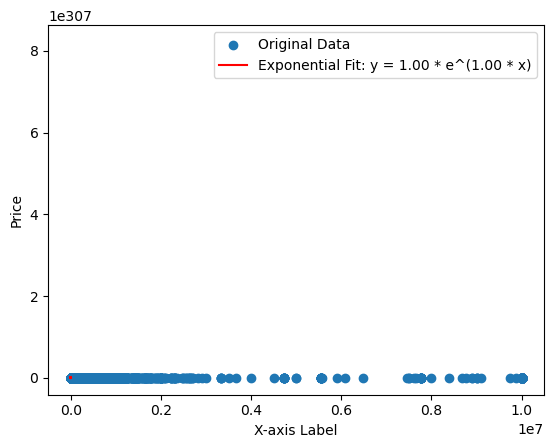

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Assuming vehicles is your DataFrame

# Extract features and target variable
X = vehicles['odometer']  # Replace 'some_feature' with the actual feature for the x-axis
y = vehicles['price']

# Check if lengths match
if len(X) != len(y):
    raise ValueError("Lengths of X and y do not match.")

# Define the exponential function
def exponential_func(x, a, b):
    return a * np.exp(b * x)

# Use curve_fit to fit the exponential function to your data
params, covariance = curve_fit(exponential_func, X, y)

# Extract the parameters
a, b = params

# Predict y-values using the fitted parameters
y_pred = exponential_func(X, a, b)

# Plot the original data and the exponential fit
plt.scatter(X, y, label='Original Data')
plt.plot(X, y_pred, color='red', label=f'Exponential Fit: y = {a:.2f} * e^({b:.2f} * x)')
plt.xlabel('X-axis Label')  # Replace with the actual label for the x-axis
plt.ylabel('Price')
plt.legend()
plt.show()
